# Time series forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('C:/Users/user/Documents/DATA_STUDIES/time_series/Month_Value_1.csv')

In [3]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [4]:
df['Period'] = df.Period.astype('Datetime64')

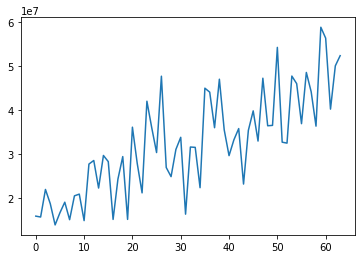

In [5]:
plt.plot(df.Revenue)

In [6]:
# This time series is not stationary, because its variance and covariance is not constant

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Revenue.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('# of lags: %f' % result[2])

ADF Statistic: -0.269149
p-value: 0.929762
# of lags: 11.000000


In [8]:
df_rev = df['Revenue'].to_frame()
df_rev.dropna(inplace=True)

In [9]:
# Integrated of order 1 (d = parameter of ARIMA)
df_rev_dif = df_rev.diff(periods = 2)
df_rev_dif = df_rev_dif.dropna() 

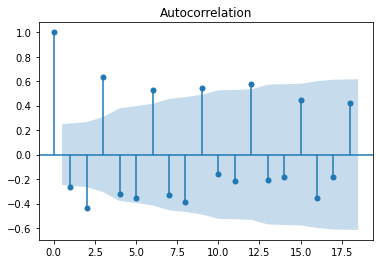

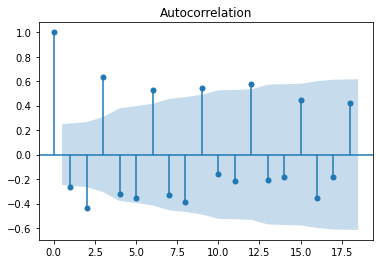

In [10]:
plot_acf(df_rev_dif)

<AxesSubplot:>

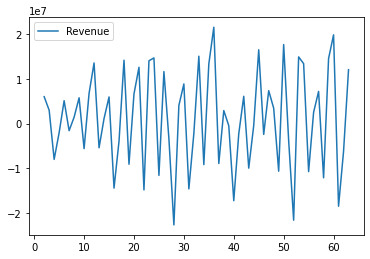

In [11]:
df_rev_dif.plot()

# Auto Regressive model

In [12]:
train = df_rev.iloc[:48]
test = df_rev.iloc[48:]

<AxesSubplot:>

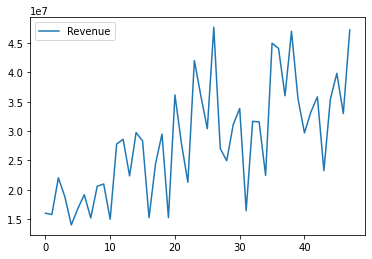

In [13]:
train.plot()

<AxesSubplot:>

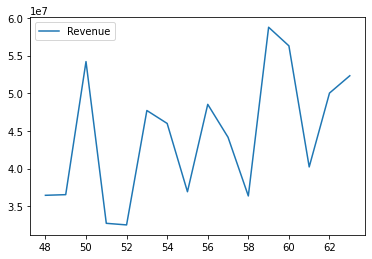

In [14]:
test.plot()

In [15]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error


In [16]:
model = AutoReg(train, 7, trend = 'ct').fit()
preds = model.predict(48, 63)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


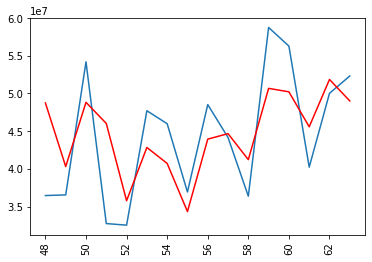

In [17]:
plt.plot(test)
plt.plot(preds, color = 'red')
plt.xticks(rotation=90)
plt.show()

In [18]:
import math
math.sqrt(mse(test, preds))

6269186.4702049475

In [19]:
forecast = model.forecast(50)

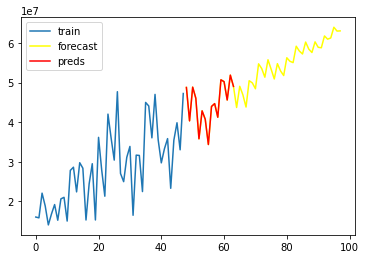

In [20]:
fig, ax = plt.subplots()
ax.plot(train)
ax.plot(forecast, color = 'yellow')
ax.plot(preds, color = 'red')
ax.legend(['train','forecast','preds'])

# ARIMA model

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model = ARIMA(train, order = (11,2,4))
model_fit = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
model_fit.aic

1569.987133751988

In [24]:
preds = model_fit.predict(48, 63)

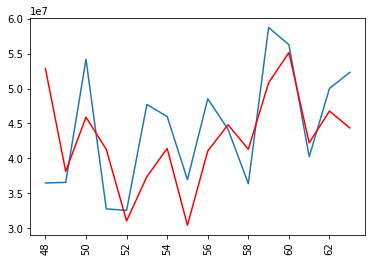

In [25]:
plt.plot(test)
plt.plot(preds, color = 'red')
plt.xticks(rotation=90)
plt.show()

In [26]:
math.sqrt(mse(test, preds))

7112733.008055213

In [27]:
forecast = model_fit.forecast(50)

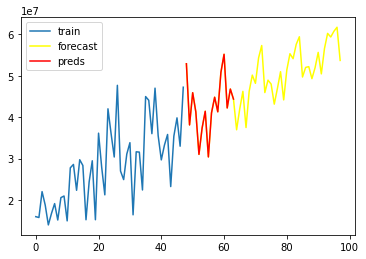

In [28]:
fig, ax = plt.subplots()
ax.plot(train)
ax.plot(forecast, color = 'yellow')
ax.plot(preds, color = 'red')
ax.legend(['train','forecast','preds'])